In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read the CSV file
file_path = "../dataset/data.csv"  # Update this path to the actual location of your CSV file
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



In [3]:
# Step 2: Filter data for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]
sales_data = store_1_dept_1['Weekly_Sales']


In [4]:
# Step 3: Split data into train and test sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]


In [5]:
# Step 4: Fit the ARIMA model on the training data
model = ARIMA(train, order=(5, 1, 0))  # Adjust the (p, d, q) parameters based on ACF/PACF plots or model tuning
model_fit = model.fit()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [6]:
# Step 5: Forecast the entire series, including the test set
full_predictions = model_fit.predict(start=0, end=len(sales_data) - 1, dynamic=False)

# Evaluate the model using test data only
test_predictions = full_predictions[-len(test):]
rmse = np.sqrt(mean_squared_error(test, test_predictions))
mae = mean_absolute_error(test, test_predictions)
mape = np.mean(np.abs((test - test_predictions) / test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 18830.77
MAE: 18494.02
MAPE: 103.56%


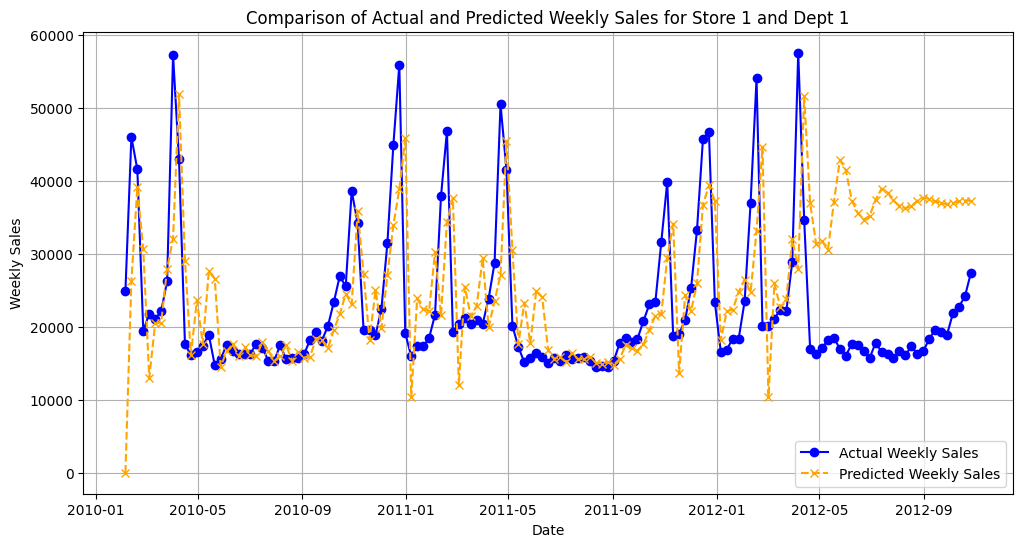

In [7]:
# Step 6: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data, label='Actual Weekly Sales', color='blue', marker='o')
plt.plot(sales_data.index, full_predictions, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Step 7: Predict the next two weeks
last_date = store_1_dept_1.index.max()
next_two_weeks = pd.date_range(start=last_date, periods=3, freq='W')[1:]

# Fit the model on the entire dataset to forecast the next two weeks
model_full = ARIMA(sales_data, order=(5, 1, 0))
model_full_fit = model_full.fit()

# Forecast the next two weeks
future_predictions = model_full_fit.forecast(steps=2)

# Create a DataFrame for the next two weeks predictions
future_data = pd.DataFrame({
    'Date': next_two_weeks,
    'Predicted_Weekly_Sales': future_predictions
}).set_index('Date')

print("Predicted Weekly Sales for the next 2 weeks:")
print(future_data)

Predicted Weekly Sales for the next 2 weeks:
            Predicted_Weekly_Sales
Date                              
2012-11-04            25581.627422
2012-11-11            22850.052991


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


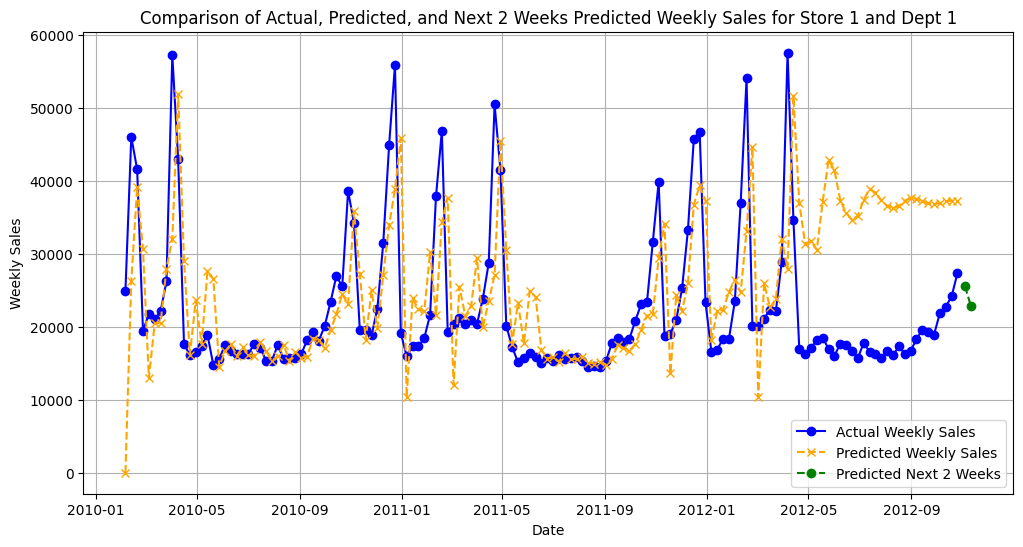

In [9]:
# Step 8: Plot predicted sales for the next two weeks
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data, label='Actual Weekly Sales', color='blue', marker='o')
plt.plot(sales_data.index, full_predictions, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.plot(future_data.index, future_data['Predicted_Weekly_Sales'], label='Predicted Next 2 Weeks', color='green', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 2 Weeks Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

cách tự nhập dự liệu nhưng dự liệu không phù hợp để ra nên t làm cách trên cho máy tự chạy m check hộ xin lỗi HÌ HÌ

In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Bước 1: Đọc tệp CSV (thay thế bằng đường dẫn thực tế của bạn)
file_path = "../dataset/data.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [12]:
# Bước 2: Lọc dữ liệu cho Cửa hàng 1 và Bộ phận 1 và xác định các biến ngoại sinh
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]
sales_data = store_1_dept_1['Weekly_Sales']
exogenous_vars = store_1_dept_1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 
                                 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]  # Các đặc trưng liên quan


In [13]:
# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]
train_exog, test_exog = exogenous_vars[:train_size], exogenous_vars[train_size:]

# Tạo và huấn luyện mô hình ARIMAX
model = ARIMA(train, order=(5, 1, 0), exog=train_exog)  # Điều chỉnh tham số nếu cần (p, d, q)
model_fit = model.fit()


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [14]:
# Bước 4: Đánh giá mô hình
y_pred = model_fit.forecast(steps=len(test), exog=test_exog)

rmse = np.sqrt(mean_squared_error(test, y_pred))
mae = mean_absolute_error(test, y_pred)
mape = np.mean(np.abs((test - y_pred) / test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 32677.12
MAE: 31788.10
MAPE: 174.24%


In [15]:
# Bước 4: Lấy tầm quan trọng của các đặc trưng và liên kết chúng với tên cột
coef_df = pd.DataFrame({
    'Variable': train_exog.columns,
    'Importance': model_fit.params[train_exog.columns]
}).sort_values(by='Importance', ascending=False)

# In tầm quan trọng của từng biến
print(coef_df)


                  Variable    Importance
CPI                    CPI   1849.443920
MarkDown4        MarkDown4      0.539014
MarkDown2        MarkDown2     -0.157085
MarkDown3        MarkDown3     -0.231998
MarkDown1        MarkDown1     -0.443770
Size                  Size     -0.838916
MarkDown5        MarkDown5     -0.866744
Temperature    Temperature   -132.725410
Fuel_Price      Fuel_Price -14052.036745
Unemployment  Unemployment -27786.292408


In [16]:
# Bước 5: Dự báo doanh số cho Cửa hàng 1 và Bộ phận 1 sử dụng mô hình ARIMAX được huấn luyện trên toàn bộ chuỗi
model_full = ARIMA(sales_data, order=(5, 1, 0), exog=exogenous_vars)
model_full_fit = model_full.fit()

# Dự báo cho toàn bộ chuỗi dữ liệu bao gồm cả dữ liệu đã biết
store_dept_sales_pred = model_full_fit.predict(start=sales_data.index[0], end=sales_data.index[-1], exog=exogenous_vars)

# Doanh số thực tế cho Cửa hàng 1 và Bộ phận 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


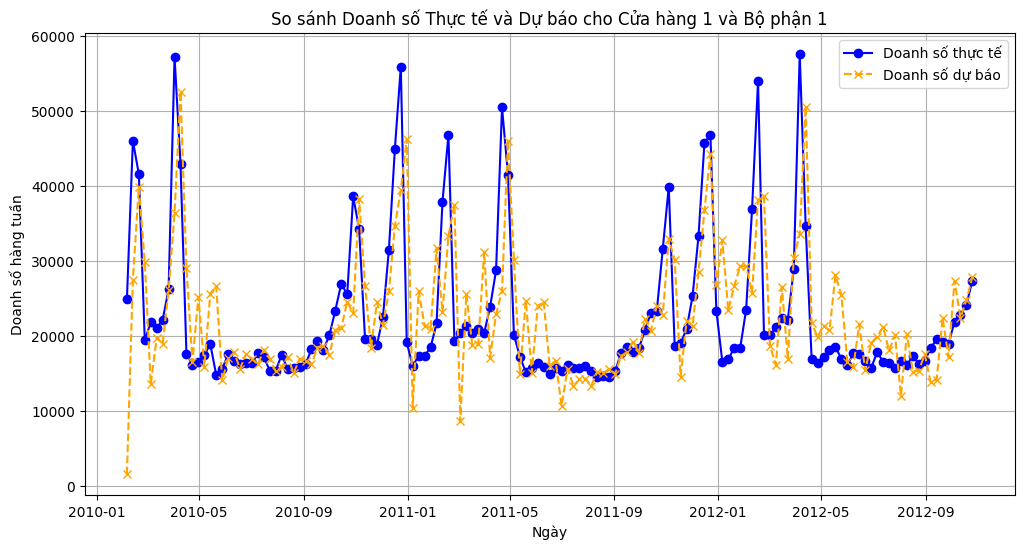

In [17]:
# Bước 6: Vẽ đồ thị so sánh doanh số thực tế và dự báo cho Cửa hàng 1 và Bộ phận 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Doanh số thực tế', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Doanh số dự báo', color='orange', marker='x', linestyle='--')
plt.xlabel('Ngày')
plt.ylabel('Doanh số hàng tuần')
plt.title('So sánh Doanh số Thực tế và Dự báo cho Cửa hàng 1 và Bộ phận 1')
plt.legend()
plt.grid()
plt.show()


In [18]:
# Bước 7: Dự báo hai tuần tiếp theo (nhập thủ công các yếu tố ngoại sinh trong tương lai)
# Lấy ngày cuối cùng từ dữ liệu
last_date = store_1_dept_1.index.max()

# Tạo danh sách các ngày cho hai tuần tiếp theo
next_two_weeks = pd.date_range(start=last_date + pd.Timedelta(days=7), periods=2, freq='W')

# Tạo DataFrame mới với các đặc trưng cho hai tuần tiếp theo
new_data = pd.DataFrame({
    'Store': [1, 1],
    'Dept': [1, 1],
    'Size': [store_1_dept_1['Size'].mean(), store_1_dept_1['Size'].mean()],  # Sử dụng giá trị trung bình của 'Size' cho dự báo
    'Temperature': [60.0, 58.0],  
    'Fuel_Price': [3.5, 3.6],     
    'MarkDown1': [0.0, 0.0],
    'MarkDown2': [0.0, 0.0],
    'MarkDown3': [0.0, 0.0],
    'MarkDown4': [0.0, 0.0],
    'MarkDown5': [0.0, 0.0],
    'CPI': [211.0, 211.0],
    'Unemployment': [8.0, 8.0]
}, index=next_two_weeks)

# Dự báo doanh số cho hai tuần tiếp theo sử dụng các biến ngoại sinh nhập thủ công
predicted_sales_next_2_weeks = model_full_fit.forecast(steps=2, exog=new_data[exogenous_vars.columns])

# Thêm doanh số dự báo vào DataFrame
new_data['Predicted_Weekly_Sales'] = predicted_sales_next_2_weeks.values

# In doanh số dự báo cho hai tuần tiếp theo
print("Doanh số dự báo cho 2 tuần tiếp theo:")
print(new_data[['Predicted_Weekly_Sales']])


Doanh số dự báo cho 2 tuần tiếp theo:
            Predicted_Weekly_Sales
2012-11-04            -2306.125671
2012-11-11            -2465.666753


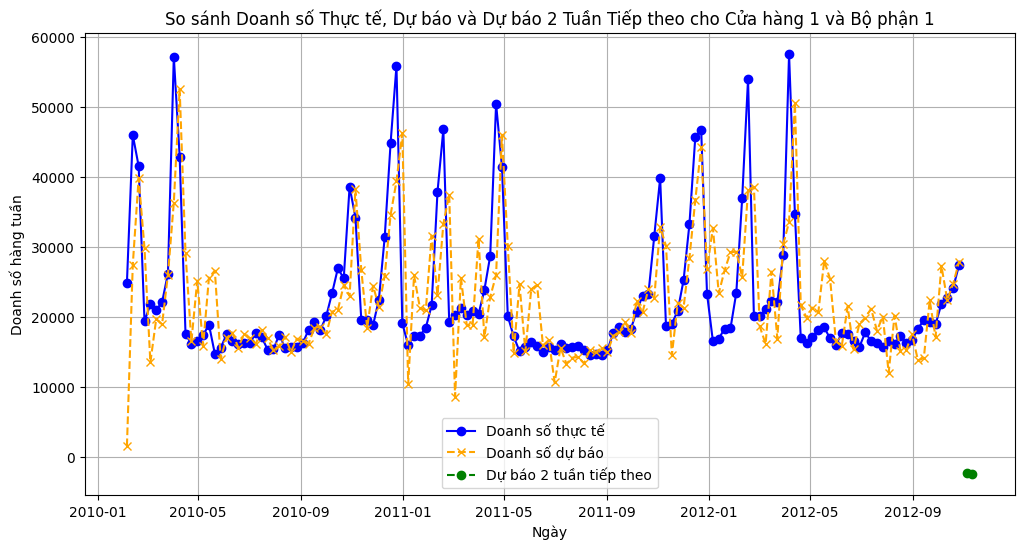

In [19]:
# Bước 8: Vẽ đồ thị doanh số dự báo cho hai tuần tiếp theo
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Doanh số thực tế', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Doanh số dự báo', color='orange', marker='x', linestyle='--')
plt.plot(new_data.index, new_data['Predicted_Weekly_Sales'], label='Dự báo 2 tuần tiếp theo', color='green', marker='o', linestyle='--')
plt.xlabel('Ngày')
plt.ylabel('Doanh số hàng tuần')
plt.title('So sánh Doanh số Thực tế, Dự báo và Dự báo 2 Tuần Tiếp theo cho Cửa hàng 1 và Bộ phận 1')
plt.legend()
plt.grid()
plt.show()
